<a href="https://colab.research.google.com/github/NiloofarT/course-content/blob/master/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import mne
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit

In [ ]:
BASE_ROOT = 'C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/'
RECORDING_ROOT = os.path.join(BASE_ROOT,'EEG_DATA/')
THINGS_EEG_ROOT = os.path.join(BASE_ROOT,'EEG_THINGS/')

In [ ]:
N_SUBJECTS = 10

In [ ]:
def get_data(concept):
    first_concept = []
    for sub_id in range(1, N_SUBJECTS + 1):
        if sub_id == 6:
            continue
        sub_eeglab = mne.io.read_raw(os.path.join(RECORDING_ROOT, f'sub-{str(sub_id).zfill(2)}/eeg/sub-{str(sub_id).zfill(2)}_task-rsvp_eeg.vhdr'))
        sub_event = mne.events_from_annotations(sub_eeglab)
        sub_epoch = mne.Epochs(sub_eeglab, sub_event[0], tmin=-.1, tmax=1, baseline=(None, None))
        sub_csv = pd.read_csv(os.path.join(RECORDING_ROOT, f'sub-{str(sub_id).zfill(2)}/eeg/sub-{str(sub_id).zfill(2)}_task-rsvp_events.csv'))
        selected_events = sub_csv.where(sub_csv['object'] == concept).dropna()['eventnumber'].to_numpy().astype(int)
        selected_epochs = sub_epoch['10001'][selected_events]
        first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())
    first_concept = np.array(first_concept)
    return np.reshape(first_concept, (first_concept.shape[0] * first_concept.shape[1], first_concept.shape[2], first_concept.shape[3]))

In [ ]:
face = get_data('face')
granola = get_data('granola')
piano = get_data('piano')
centerpiece = get_data('centerpiece')
ice = get_data('ice')
pinball = get_data('pinball')
# stir_fry = get_data('stir fry')
# straw = get_data('straw')
curry = get_data('curry')
slicer = get_data('slicer')
potpourri = get_data('potpourri')
tostada = get_data('tostada')
buffet = get_data('buffet')
basket = get_data('basket')
salad = get_data('salad')
bush = get_data('bush')
ticktacktoe = get_data('ticktacktoe')
sundae = get_data('sundae')
pizza = get_data('pizza')
tuxedo = get_data('tuxedo')
mulch = get_data('mulch')
scarecrow = get_data('scarecrow')
lava = get_data('lava')
spatula = get_data('spatula')
hay = get_data('hay')
necklace = get_data('necklace')
leotard = get_data('leotard')
hash_c = get_data('hash')
oyster = get_data('oyster')
bark = get_data('bark')

Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequenc

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Applying average reference.
Applying a custom ('EEG',) reference.
Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge:

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 d

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequenc

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequenc

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequenc

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Applying average reference.
Applying a custom ('EEG',) reference.
Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge:

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Applying a custom ('EEG',) reference.
Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition ban

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Applying a custom ('EEG',) reference.
Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition ban

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Applying average reference.
Applying a custom ('EEG',) reference.
Extracting parameters from C:/Users/wsurx/PycharmProjects/EEG_PREPROCESS/Recording/EEG_DATA/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge:

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


Setting channel info structure...
Used Annotations descriptions: ['Event/E  1', 'Event/E  2', 'Event/E  3', 'New Segment/']
Not setting metadata
Not setting metadata
44569 matching events found
Setting baseline interval to [-0.1, 1.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 12 events and 1101 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 1 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter len

C:\Users\wsurx\AppData\Local\Temp/ipykernel_6840/1319060889.py:12: RuntimeWarning: filter_length (3301) is longer than the signal (1101), distortion is likely. Reduce filter length or filter a longer signal.
  first_concept.append(selected_epochs.load_data().set_eeg_reference(ref_channels='average').filter(h_freq=150, l_freq=1).set_eeg_reference(ref_channels='average').get_data())


In [ ]:
piano.shape

(12, 63, 1101)

In [ ]:
concepts = [granola, face, piano, centerpiece, ice, pinball, curry, slicer, potpourri,
            tostada, buffet, basket, salad, bush, ticktacktoe, sundae, pizza, tuxedo, mulch, scarecrow,
            lava, spatula, hay, necklace, leotard, hash_c, oyster, bark]
conf_matrix = np.zeros((len(concepts), len(concepts)))
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
for row, conc1 in enumerate(concepts):
    print(f'Started concept #{row}.')
    if row == len(concepts)-1:
        continue
    for col, conc2 in enumerate(concepts[row+1:], row+1):
        std_over_sample = np.zeros((conc1.shape[2],))
        accuracy_over_time = np.zeros((conc1.shape[2],))
        recall_over_time = np.zeros((conc1.shape[2],))
        for time_sample in range(conc1.shape[2]):
            X = np.concatenate((conc1[:, :, time_sample], conc2[:, :, time_sample]))
            y = np.concatenate((np.zeros((conc1.shape[0],)), np.ones((conc2.shape[0],))))
            # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
            clf = LinearDiscriminantAnalysis()
#             acc = cross_val_score(clf, X, y, cv=7)
            rec = cross_val_score(clf, X, y, scoring='recall', cv=cv)
#             accuracy_over_time[time_sample] = acc.mean()
            recall_over_time[time_sample] = rec.mean()
#             std_over_sample[time_sample] = acc.std()
        conf_matrix[row, col] = recall_over_time[150:350].mean()
        conf_matrix[col, row] = recall_over_time[150:350].mean()

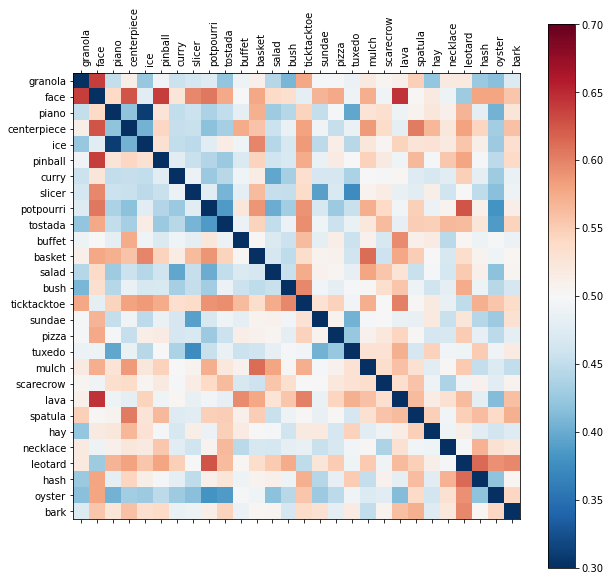

In [ ]:
fig, ax = plt.subplots(1)
im = ax.matshow(conf_matrix, cmap='RdBu_r', clim=[0.3, 0.7])
concept_string = ['granola', 'face', 'piano', 'centerpiece', 'ice', 'pinball', 'curry', 'slicer', 'potpourri',
            'tostada', 'buffet', 'basket', 'salad', 'bush', 'ticktacktoe', 'sundae', 'pizza', 'tuxedo', 'mulch', 'scarecrow',
            'lava', 'spatula', 'hay', 'necklace', 'leotard', 'hash', 'oyster', 'bark']
ax.set_yticks(range(len(concepts)))
ax.set_yticklabels(concept_string)
ax.set_xticks(range(len(concepts)))
ax.set_xticklabels(concept_string, rotation=90, ha='left')
plt.rcParams['figure.figsize'] = [1000, 1000]
plt.colorbar(im)
plt.show()

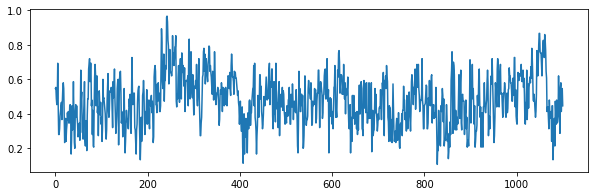

In [ ]:
# plt.subplot(3, 1, 1)
# plt.plot(accuracy_over_time)
# plt.subplot(3, 1, 2)
# plt.plot(recall_over_time)
# plt.subplot(3, 1, 3)
# plt.plot(std_over_sample)
plt.rcParams['figure.figsize'] = [10, 3]
plt.plot(recall_over_time)

In [ ]:
smooth_accuracy = np.zeros_like(accuracy_over_time)

In [ ]:
padding = 5
window_size = 30
starting_point = int(window_size/2)
recall_over_time = np.pad(recall_over_time, (padding, padding), 'constant', constant_values=(0, 0))

In [ ]:
for indx in range(starting_point, len(smooth_accuracy)):
    smooth_accuracy[indx] = recall_over_time[indx-starting_point:indx+starting_point].mean()

In [ ]:
smooth_accuracy[0] = recall_over_time[4]
smooth_accuracy[-1] = recall_over_time[-2]

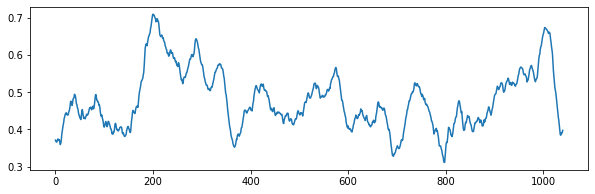

In [ ]:
plt.plot(smooth_accuracy[window_size+starting_point*2-5:-window_size-starting_point+40])